In [2]:

!pip install workalendar
!pip install prophet
!pip install xgboost


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Load our fixed data



In [4]:
import pandas as pd

df = pd.read_csv("Training_sorted.csv")

# Change column names to lower case and drop id (row number)


<a id='eda'></a>
# EDA and Feature engineering

In this section, I will go through several steps to continue transforming the original dataset

* More data preparation drop uninformative features and remove outliers and feature importance
* Feature understanding. Understand the trend and different seasonalities in the data

## Data understanding


In [5]:
df.head()

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
0,2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.182,6.888,6.279,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
1,2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.560,7.245,6.615,...,1.6,297.0,297.0,6.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2,2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.560,7.245,6.615,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
3,2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.182,6.888,6.279,...,1.8,333.0,11.0,4.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
4,2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.182,6.888,6.279,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0


In [6]:
df.describe()

,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
count,39457.000000,39457.000000,39457.000000,39457.000000,39457.000000,39457.000000,39457.000000,39457.000000,39457.000000,39457.000000,...,39457.000000,39457.000000,39457.000000,39457.000000,39457.0,3.945700e+04,3.945700e+04,3.945700e+04,39457.0,39457.0
mean,-0.161387,25.389185,26.005382,25.307721,26.613921,25.937096,27.606046,27.049123,25.945017,25.992124,...,24.888258,209.972704,211.824569,32.291756,927916.0,5.070000e+01,-1.199997e+00,6.143093e+01,0.0,10.0
std,2.117479,13.960507,14.019385,13.940617,14.067299,13.994607,14.066525,14.055649,13.999082,14.011439,...,9.542311,72.327592,72.747261,11.355410,0.0,2.275187e-11,8.637645e-13,4.116226e-11,0.0,0.0
min,-34.962000,-10.080000,-10.584000,-10.080000,-11.088000,-10.584000,-12.096000,-11.592000,-10.584000,-10.584000,...,0.000000,1.000000,0.000000,1.100000,927916.0,5.070000e+01,-1.199997e+00,6.143093e+01,0.0,10.0
25%,-1.132000,12.789000,13.429500,12.789000,14.070000,13.429500,15.351000,14.710500,13.429500,13.429500,...,22.700000,212.000000,212.000000,30.600000,927916.0,5.070000e+01,-1.199997e+00,6.143093e+01,0.0,10.0
50%,-0.044000,25.872000,26.680500,25.221000,27.720000,26.460000,29.851500,28.497000,26.460000,26.680500,...,22.700000,229.000000,233.000000,31.700000,927916.0,5.070000e+01,-1.199997e+00,6.143093e+01,0.0,10.0
75%,0.888000,34.996500,34.996500,34.996500,34.996500,34.996500,34.996500,34.996500,34.996500,34.996500,...,25.400000,229.000000,233.000000,31.700000,927916.0,5.070000e+01,-1.199997e+00,6.143093e+01,0.0,10.0
max,35.078000,77.994000,77.994000,77.994000,77.994000,77.994000,77.994000,77.994000,77.994000,77.994000,...,103.600000,360.000000,360.000000,122.800000,927916.0,5.070000e+01,-1.199997e+00,6.143093e+01,0.0,10.0


In [7]:
df.shape

(39457, 253)

In [8]:
#df.set_index("UTC_Settlement_DateTime", inplace=True)  # I should not be doing this again! it looks very bad...remember to do this the test when you bring it back

In [9]:
df

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
0,2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
1,2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,1.6,297.0,297.0,6.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2,2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
3,2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,1.8,333.0,11.0,4.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
4,2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39452,2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
39453,2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,...,41.6,241.0,238.0,45.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
39454,2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
39455,2022-11-10 23:00:00,-1.498,2.877,3.024,2.877,3.1605,3.024,3.4545,3.3075,3.024,...,43.9,239.0,237.0,46.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0


In [10]:
df['UTC_Settlement_DateTime'] = pd.to_datetime(df['UTC_Settlement_DateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39457 entries, 0 to 39456
Columns: 253 entries, UTC_Settlement_DateTime to elevationSouthhampton - Portsmouth_weather
dtypes: datetime64[ns](1), float64(252)
memory usage: 76.2 MB


In [11]:
df.isna().any()

UTC_Settlement_DateTime                                False
Target                                                 False
East_Midlands_price                                    False
Eastern_England_price                                  False
London_price                                           False
                                                       ...  
latitudeSouthhampton - Portsmouth_weather              False
longitudeSouthhampton - Portsmouth_weather             False
generationtime_msSouthhampton - Portsmouth_weather     False
utc_offset_secondsSouthhampton - Portsmouth_weather    False
elevationSouthhampton - Portsmouth_weather             False
Length: 253, dtype: bool

### Bank holidays

Bank holidays are very important in time series forecasting as they often affect the data values on those days.

Since the dataset covers electricity demand for England and Wales, the first step is to check that the two countries have the same bank holidays:

In [12]:
import holidays
# Compare England's and Wales' bank holiday
bank_holiday_england = holidays.UK(
    subdiv="England", years=range(2009, 2024), observed=True
).items()
bank_holiday_wales = holidays.UK(
    subdiv="Wales", years=range(2009, 2024), observed=True
).items()

print(bank_holiday_england == bank_holiday_wales)

True


This needs to the questions that we need to remove Belfast and Glasgow from the dataset as one is in Scotland and although I am not sure about Belfast I will do it anyway

In [13]:
df = df[df.columns.drop(list(df.filter(regex='Glasgow')))]

In [14]:
df = df[df.columns.drop(list(df.filter(regex='Belfast')))]

In [15]:
df

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
0,2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
1,2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,1.6,297.0,297.0,6.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2,2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
3,2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,1.8,333.0,11.0,4.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
4,2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39452,2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
39453,2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,...,41.6,241.0,238.0,45.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
39454,2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,...,22.7,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
39455,2022-11-10 23:00:00,-1.498,2.877,3.024,2.877,3.1605,3.024,3.4545,3.3075,3.024,...,43.9,239.0,237.0,46.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0


Now it's only England and Wales let's go with holidays

In [16]:
# Create empty lists to store data
holiday_names = []
holiday_dates = []
holiday_names_observed = []
holiday_dates_observed = []

for date, name in sorted(bank_holiday_england):
    holiday_dates.append(date)
    holiday_names.append(name)
    # Pop the previous value as observed bank holidays takes place later
    if "Observed" in name:
        holiday_dates_observed.pop()
        holiday_names_observed.pop()

    holiday_names_observed.append(name)
    holiday_dates_observed.append(np.datetime64(date))

holiday_dates_observed[:5]

[numpy.datetime64('2009-01-01'),
 numpy.datetime64('2009-04-10'),
 numpy.datetime64('2009-04-13'),
 numpy.datetime64('2009-05-04'),
 numpy.datetime64('2009-05-25')]

Once I've verified that the holidays are correctly loaded, one can compare the `holiday_dates` variable and the date in the dataset and store the boolean output in a new column: 

In [17]:
df["is_holiday"] = df['UTC_Settlement_DateTime'].apply(
    lambda x: pd.to_datetime(x) in holiday_dates_observed
)

df["is_holiday"] = df["is_holiday"].astype(int)

df[df["is_holiday"] == 1].sample(7)

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,is_holiday
11233,2021-04-02,-1.926,11.340,11.9070,11.340,12.4740,11.9070,13.6080,13.0410,11.9070,...,52.0,53.0,42.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1
18433,2021-08-30,0.028,20.790,21.8295,20.790,22.8690,21.8295,24.9480,23.9085,21.8295,...,27.0,30.0,30.2,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1
6529,2020-12-25,-4.520,13.293,13.9545,13.293,14.6265,13.9545,15.9495,15.2880,13.9545,...,343.0,345.0,47.5,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1
24049,2021-12-25,-4.124,33.264,34.9230,33.264,34.9965,34.9230,34.9965,34.9965,34.9230,...,203.0,218.0,10.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1
14065,2021-05-31,0.420,13.188,13.8495,13.188,14.5110,13.8495,15.8235,15.1620,13.8495,...,65.0,71.0,26.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1
11377,2021-04-05,0.862,2.100,2.2050,2.100,2.3100,2.2050,2.5200,2.4150,2.2050,...,291.0,295.0,32.4,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1
35905,2022-08-29,0.214,54.999,54.9990,54.999,54.9990,54.9990,54.9990,54.9990,54.9990,...,25.0,19.0,30.2,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,1


In [18]:
df

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,is_holiday
0,2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
1,2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,297.0,297.0,6.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
2,2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
3,2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,333.0,11.0,4.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
4,2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39452,2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39453,2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,...,241.0,238.0,45.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39454,2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39455,2022-11-10 23:00:00,-1.498,2.877,3.024,2.877,3.1605,3.024,3.4545,3.3075,3.024,...,239.0,237.0,46.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0


### Outlier analysis



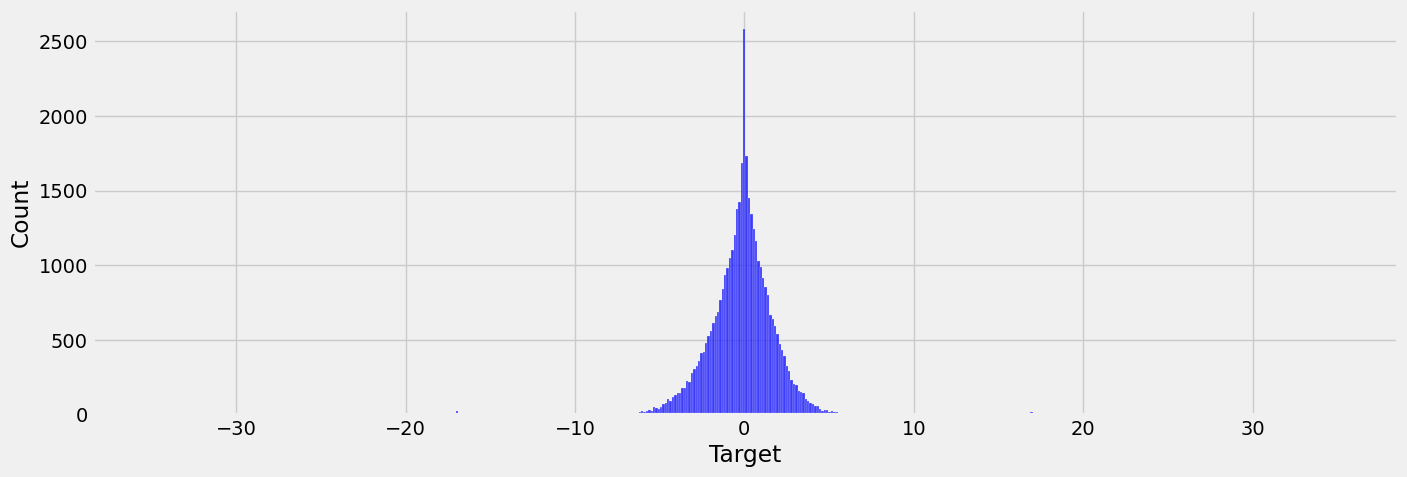

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(data=df, x="Target", bins=500, ax=ax, color="b");

In [20]:
df.loc[df['Target'] >10]

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,is_holiday
5785,2020-12-09 12:00:00,20.092,21.2100,22.2705,21.2100,23.3310,22.2705,25.4520,24.3915,22.2705,...,284.0,283.0,22.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
6357,2020-12-21 10:00:00,35.050,10.3320,10.8465,10.3320,11.3610,10.8465,12.4005,11.8860,10.8465,...,229.0,231.0,58.0,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
7221,2021-01-08 10:00:00,35.078,18.9000,19.8450,18.9000,20.7900,19.8450,22.6800,21.7350,19.8450,...,49.0,52.0,13.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
8184,2021-01-28 11:30:00,35.040,12.6840,13.3140,12.6840,13.9545,13.3140,15.2250,14.5845,13.3140,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
28295,2022-03-23 11:00:00,34.164,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,357.0,357.0,29.5,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
28342,2022-03-24 10:30:00,34.556,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
28580,2022-03-29 09:30:00,34.142,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
33584,2022-07-11 15:30:00,17.474,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
33630,2022-07-12 14:30:00,11.942,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
33634,2022-07-12 16:30:00,33.108,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0


In [21]:
df.loc[df['Target'] < -10]

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,is_holiday
5784,2020-12-09 11:30:00,-24.522,21.000,22.0500,21.000,23.1000,22.0500,25.200,24.1500,22.0500,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
6356,2020-12-21 09:30:00,-27.926,10.920,11.4660,10.920,12.0120,11.4660,13.104,12.5580,11.4660,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
7220,2021-01-08 09:30:00,-22.974,21.000,22.0500,21.000,23.1000,22.0500,25.200,24.1500,22.0500,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
7222,2021-01-08 10:30:00,-11.784,20.160,21.1680,20.160,22.1760,21.1680,24.192,23.1840,21.1680,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
8183,2021-01-28 11:00:00,-15.182,12.285,12.8940,12.285,13.5135,12.8940,14.742,14.1330,12.8940,...,259.0,263.0,54.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35812,2022-08-27 01:30:00,-24.246,54.999,54.9990,54.999,54.9990,54.9990,54.999,54.9990,54.9990,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
36067,2022-09-01 09:00:00,-16.732,77.994,77.9940,77.994,77.9940,77.9940,77.994,77.9940,77.9940,...,20.0,19.0,51.1,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
36068,2022-09-01 09:30:00,-34.962,77.994,77.9940,77.994,77.9940,77.9940,77.994,77.9940,77.9940,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
36073,2022-09-01 12:00:00,-21.322,77.994,77.9940,77.994,77.9940,77.9940,77.994,77.9940,77.9940,...,19.0,18.0,49.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0


Ok so values bigger that 10MW are 60 which is 0.15% of the total. And < thanks -10 is 71 which is 0.18%. I am going to remove all of them

In [22]:
df = df[(df['Target'] <= 10) & (df['Target'] >= -10)]
df

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,is_holiday
0,2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
1,2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,297.0,297.0,6.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
2,2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
3,2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,333.0,11.0,4.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
4,2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39452,2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39453,2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,...,241.0,238.0,45.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39454,2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39455,2022-11-10 23:00:00,-1.498,2.877,3.024,2.877,3.1605,3.024,3.4545,3.3075,3.024,...,239.0,237.0,46.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0


In [23]:
df

,UTC_Settlement_DateTime,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,...,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,is_holiday
0,2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
1,2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,297.0,297.0,6.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
2,2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
3,2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,333.0,11.0,4.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
4,2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39452,2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39453,2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,...,241.0,238.0,45.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39454,2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,...,229.0,233.0,31.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0
39455,2022-11-10 23:00:00,-1.498,2.877,3.024,2.877,3.1605,3.024,3.4545,3.3075,3.024,...,239.0,237.0,46.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0,0


## Feature creation

The `settlement_date` column is now in the right format to use an index:

In [24]:
df.set_index("UTC_Settlement_DateTime", inplace=True)
#df.sort_index(inplace=True)






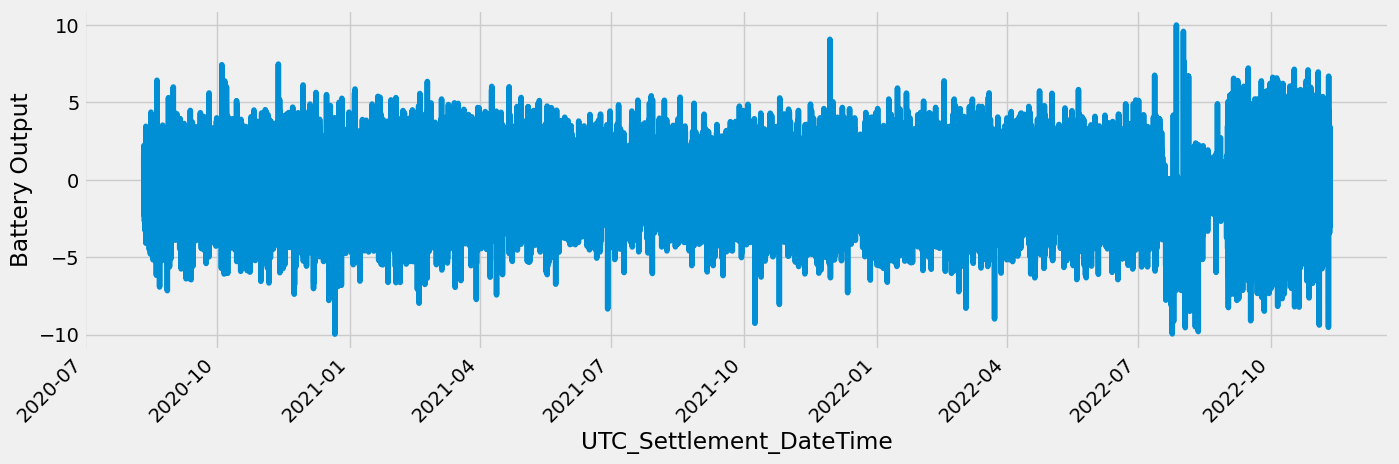

In [25]:

df["Target"].plot(figsize=(15, 5), ylabel="Battery Output")
plt.xticks(rotation=45)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39326 entries, 2020-08-10 23:30:00 to 2022-11-10 23:30:00
Columns: 205 entries, Target to is_holiday
dtypes: float64(204), int32(1)
memory usage: 61.7 MB


 XGBoost will benefit from adding extra features. Also good  adding lags. Again, XGBoost will benefit from this.

In [27]:
def create_features(df):
    """
    Create time series features based on time series index

    Args:
        - df: time series dataframe

    Returns:
        - df: time series dataframe with new features
    """
    df = df.copy()
    df["day_of_month"] = df.index.day
    df["day_of_week"] = df.index.day_of_week
    df["day_of_year"] = df.index.day_of_year
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["week_of_year"] = df.index.isocalendar().week.astype("int64")
    return df


def add_lags(df):
    """
    Add three lags to the dataset containing information from the previous 3 years.

    Args:
        - df: time series dataframe

    Returns:
        - df: time series dataframe with lags
    """
    target_map = df["Target"].to_dict()
    # 364 is chosen instead of 365 becuase 364 is divisible by 4 and that way we don't have to
    # map specific days
    df["lag1"] = (df.index - pd.Timedelta("184 days")).map(target_map)
    df["lag2"] = (df.index - pd.Timedelta("364 days")).map(target_map)
    df["lag3"] = (df.index - pd.Timedelta("548 days")).map(target_map)
    return df

In [28]:
df = create_features(df)
df = add_lags(df)

df.sample(n=5)

,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,...,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year,lag1,lag2,lag3
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2022-09-11 16:00:00,2.924,77.9940,77.9940,77.9940,77.9940,77.9940,77.9940,77.9940,77.9940,77.9940,...,11,6,254,3,9,2022,36,0.762,0.596,1.260
2022-03-28 18:00:00,-1.436,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,28,0,87,1,3,2022,13,-1.478,0.708,-1.678
2022-07-05 06:00:00,-0.330,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,5,1,186,3,7,2022,27,-4.292,2.994,-0.060
2022-03-22 00:30:00,0.522,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,34.9965,...,22,1,81,1,3,2022,12,-0.248,-0.316,-0.626
2021-07-12 23:30:00,0.000,15.9600,16.7580,15.9600,17.5560,16.7580,19.1520,18.3540,16.7580,16.7580,...,12,0,193,3,7,2021,28,1.026,NaN,NaN


In [29]:
df.head()

,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,...,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year,lag1,lag2,lag3
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.182,6.888,6.279,6.279,...,10,0,223,3,8,2020,33,NaN,NaN,NaN
2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.560,7.245,6.615,6.615,...,11,1,224,3,8,2020,33,NaN,NaN,NaN
2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.560,7.245,6.615,6.615,...,11,1,224,3,8,2020,33,NaN,NaN,NaN
2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.182,6.888,6.279,6.279,...,11,1,224,3,8,2020,33,NaN,NaN,NaN
2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.182,6.888,6.279,6.279,...,11,1,224,3,8,2020,33,NaN,NaN,NaN


In [30]:
df = df.fillna(0)

In [31]:
df

,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,...,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year,lag1,lag2,lag3
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,6.279,...,10,0,223,3,8,2020,33,0.000,0.000,0.000
2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,6.615,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,6.615,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,6.279,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,6.279,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,22.050,...,10,3,314,4,11,2022,45,0.724,-0.400,-1.712
2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,21.168,...,10,3,314,4,11,2022,45,-2.304,-0.786,-1.844
2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,16.317,...,10,3,314,4,11,2022,45,0.956,0.426,-0.768


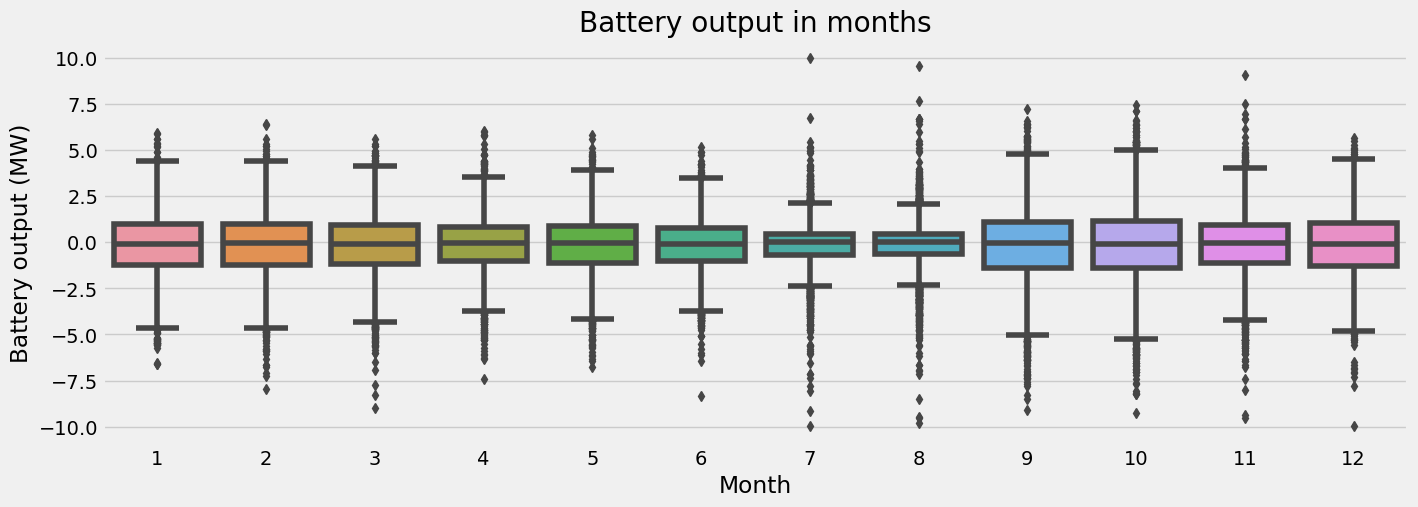

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="month", y="Target", data=df)

ax.set_xlabel("Month")
ax.set_ylabel("Battery output (MW)")
ax.set_title("Battery output in months");

It seems that the lowest consumption occurs during the summer months. 



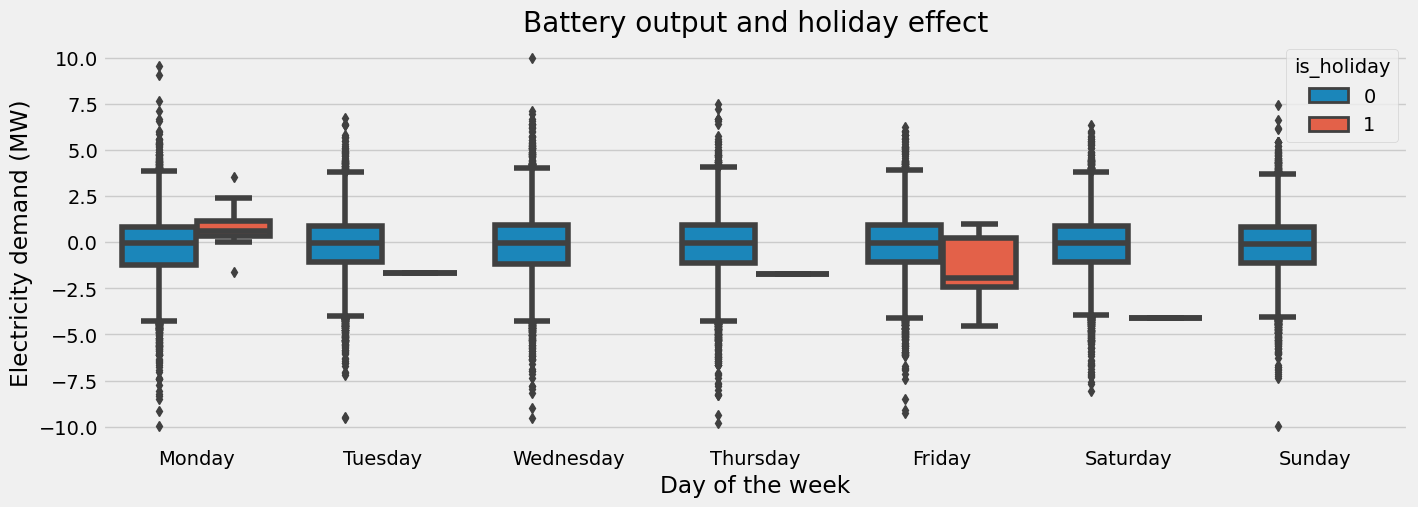

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="day_of_week", y="Target", data=df, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ax.set_xlabel("Day of the week")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Battery output and holiday effect");

More comsumtion on Ban Holidays?

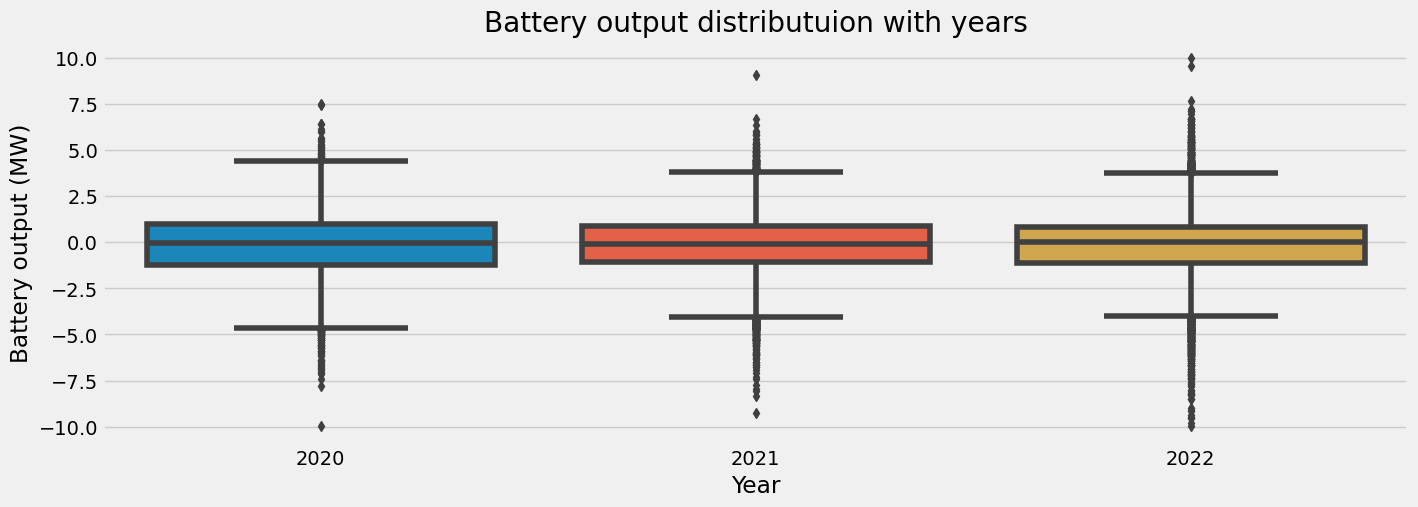

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="Target", data=df)

ax.set_xlabel("Year")
ax.set_ylabel("Battery output (MW)")
ax.set_title("Battery output distributuion with years");

Usage of the Battery is quite similar

# Sort out Test dataset

In [35]:
df1 = pd.read_csv('Test_sorted.csv')

In [36]:
df1

,UTC_Settlement_DateTime,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
0,2022-01-12 00:00:00,35.071785,37.717785,35.797230,40.363785,37.717785,45.655785,43.009785,37.717785,37.717785,...,23.5,54.0,49.0,22.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
1,2022-01-12 00:30:00,38.851785,41.686785,38.851785,44.521785,41.686785,50.191785,47.356785,41.686785,41.686785,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2,2022-01-12 01:00:00,35.533785,38.200785,35.797230,40.867785,38.200785,46.212285,43.545285,38.200785,38.200785,...,23.4,49.0,43.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
3,2022-01-12 01:30:00,33.874785,36.457785,35.797230,39.051285,36.457785,44.217285,41.634285,36.457785,36.457785,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
4,2022-01-12 02:00:00,33.018090,35.056875,35.797230,36.940785,34.452285,41.928285,39.439785,34.452285,34.452285,...,23.4,51.0,44.0,21.6,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,2023-12-05 21:30:00,17.010000,17.860500,17.010000,18.711000,17.860500,20.412000,19.561500,17.860500,17.860500,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
9884,2023-12-05 22:00:00,19.918500,20.916000,19.918500,21.913500,20.916000,23.898000,22.911000,20.916000,20.916000,...,38.1,21.0,23.0,50.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
9885,2023-12-05 22:30:00,17.892000,18.784500,17.892000,19.677000,18.784500,21.472500,20.580000,18.784500,18.784500,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
9886,2023-12-05 23:00:00,19.950000,20.947500,19.950000,21.945000,20.947500,23.940000,22.942500,20.947500,20.947500,...,39.5,22.0,24.0,49.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0


In [37]:
df1['UTC_Settlement_DateTime'] = pd.to_datetime(df1['UTC_Settlement_DateTime'])

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Columns: 252 entries, UTC_Settlement_DateTime to elevationSouthhampton - Portsmouth_weather
dtypes: datetime64[ns](1), float64(251)
memory usage: 19.0 MB


In [39]:
df1 = df1[df1.columns.drop(list(df1.filter(regex='Glasgow')))]

In [40]:
df1 = df1[df1.columns.drop(list(df1.filter(regex='Belfast')))]

In [41]:
df1.set_index("UTC_Settlement_DateTime", inplace=True)


In [42]:
df1

,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,West_Midlands_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-12 00:00:00,35.071785,37.717785,35.797230,40.363785,37.717785,45.655785,43.009785,37.717785,37.717785,37.717785,...,23.5,54.0,49.0,22.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 00:30:00,38.851785,41.686785,38.851785,44.521785,41.686785,50.191785,47.356785,41.686785,41.686785,41.686785,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 01:00:00,35.533785,38.200785,35.797230,40.867785,38.200785,46.212285,43.545285,38.200785,38.200785,38.200785,...,23.4,49.0,43.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 01:30:00,33.874785,36.457785,35.797230,39.051285,36.457785,44.217285,41.634285,36.457785,36.457785,36.457785,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 02:00:00,33.018090,35.056875,35.797230,36.940785,34.452285,41.928285,39.439785,34.452285,34.452285,34.452285,...,23.4,51.0,44.0,21.6,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05 21:30:00,17.010000,17.860500,17.010000,18.711000,17.860500,20.412000,19.561500,17.860500,17.860500,17.860500,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2023-12-05 22:00:00,19.918500,20.916000,19.918500,21.913500,20.916000,23.898000,22.911000,20.916000,20.916000,20.916000,...,38.1,21.0,23.0,50.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2023-12-05 22:30:00,17.892000,18.784500,17.892000,19.677000,18.784500,21.472500,20.580000,18.784500,18.784500,18.784500,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0


In [43]:
df1.sort_index()

,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,West_Midlands_price,...,windspeed_100mSouthhampton - Portsmouth_weather,winddirection_10mSouthhampton - Portsmouth_weather,winddirection_100mSouthhampton - Portsmouth_weather,windgusts_10mSouthhampton - Portsmouth_weather,populationSouthhampton - Portsmouth_weather,latitudeSouthhampton - Portsmouth_weather,longitudeSouthhampton - Portsmouth_weather,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-12 00:00:00,35.071785,37.717785,35.797230,40.363785,37.717785,45.655785,43.009785,37.717785,37.717785,37.717785,...,23.5,54.0,49.0,22.7,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 00:30:00,38.851785,41.686785,38.851785,44.521785,41.686785,50.191785,47.356785,41.686785,41.686785,41.686785,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 01:00:00,35.533785,38.200785,35.797230,40.867785,38.200785,46.212285,43.545285,38.200785,38.200785,38.200785,...,23.4,49.0,43.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 01:30:00,33.874785,36.457785,35.797230,39.051285,36.457785,44.217285,41.634285,36.457785,36.457785,36.457785,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2022-01-12 02:00:00,33.018090,35.056875,35.797230,36.940785,34.452285,41.928285,39.439785,34.452285,34.452285,34.452285,...,23.4,51.0,44.0,21.6,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05 21:30:00,17.010000,17.860500,17.010000,18.711000,17.860500,20.412000,19.561500,17.860500,17.860500,17.860500,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2023-12-05 22:00:00,19.918500,20.916000,19.918500,21.913500,20.916000,23.898000,22.911000,20.916000,20.916000,20.916000,...,38.1,21.0,23.0,50.8,927916.0,50.699997,-1.199997,61.430931,0.0,10.0
2023-12-05 22:30:00,17.892000,18.784500,17.892000,19.677000,18.784500,21.472500,20.580000,18.784500,18.784500,18.784500,...,27.4,54.0,252.0,22.3,927916.0,50.699997,-1.199997,61.430931,0.0,10.0


In [44]:
df1 = create_features(df1)


df1.sample(n=5)

,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,West_Midlands_price,...,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2023-05-18 10:00:00,16.1910,16.9995,16.1910,17.808,16.9995,19.425,18.6165,16.9995,16.9995,16.9995,...,61.430931,0.0,10.0,18,3,138,2,5,2023,20
2022-12-29 10:00:00,18.9000,19.8450,18.9000,20.790,19.8450,22.680,21.7350,19.8450,19.8450,19.8450,...,61.430931,0.0,10.0,29,3,363,4,12,2022,52
2023-07-04 14:00:00,17.6400,18.5220,17.6400,19.404,18.5220,21.168,20.2860,18.5220,18.5220,18.5220,...,61.430931,0.0,10.0,4,1,185,3,7,2023,27
2023-02-19 21:30:00,18.4800,19.4040,18.4800,20.328,19.4040,22.176,21.2520,19.4040,19.4040,19.4040,...,61.430931,0.0,10.0,19,6,50,1,2,2023,7
2023-04-19 12:00:00,19.2675,20.2335,19.2675,21.189,20.2335,23.121,22.1550,20.2335,20.2335,20.2335,...,61.430931,0.0,10.0,19,2,109,2,4,2023,16


In [45]:
df1

,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,West_Midlands_price,...,generationtime_msSouthhampton - Portsmouth_weather,utc_offset_secondsSouthhampton - Portsmouth_weather,elevationSouthhampton - Portsmouth_weather,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-12 00:00:00,35.071785,37.717785,35.797230,40.363785,37.717785,45.655785,43.009785,37.717785,37.717785,37.717785,...,61.430931,0.0,10.0,12,2,12,1,1,2022,2
2022-01-12 00:30:00,38.851785,41.686785,38.851785,44.521785,41.686785,50.191785,47.356785,41.686785,41.686785,41.686785,...,61.430931,0.0,10.0,12,2,12,1,1,2022,2
2022-01-12 01:00:00,35.533785,38.200785,35.797230,40.867785,38.200785,46.212285,43.545285,38.200785,38.200785,38.200785,...,61.430931,0.0,10.0,12,2,12,1,1,2022,2
2022-01-12 01:30:00,33.874785,36.457785,35.797230,39.051285,36.457785,44.217285,41.634285,36.457785,36.457785,36.457785,...,61.430931,0.0,10.0,12,2,12,1,1,2022,2
2022-01-12 02:00:00,33.018090,35.056875,35.797230,36.940785,34.452285,41.928285,39.439785,34.452285,34.452285,34.452285,...,61.430931,0.0,10.0,12,2,12,1,1,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05 21:30:00,17.010000,17.860500,17.010000,18.711000,17.860500,20.412000,19.561500,17.860500,17.860500,17.860500,...,61.430931,0.0,10.0,5,1,339,4,12,2023,49
2023-12-05 22:00:00,19.918500,20.916000,19.918500,21.913500,20.916000,23.898000,22.911000,20.916000,20.916000,20.916000,...,61.430931,0.0,10.0,5,1,339,4,12,2023,49
2023-12-05 22:30:00,17.892000,18.784500,17.892000,19.677000,18.784500,21.472500,20.580000,18.784500,18.784500,18.784500,...,61.430931,0.0,10.0,5,1,339,4,12,2023,49


In [46]:
df

,Target,East_Midlands_price,Eastern_England_price,London_price,Merseyside_and_Northern_Wales_price,North_Western_England_price,Northern_Scotland_price,South_Western_England_price,Southern_England_price,Southern_Scotland_price,...,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year,lag1,lag2,lag3
UTC_Settlement_DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-10 23:30:00,1.528,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,6.279,...,10,0,223,3,8,2020,33,0.000,0.000,0.000
2020-08-11 00:00:00,0.178,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,6.615,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
2020-08-11 00:30:00,-1.242,6.300,6.615,6.300,6.9300,6.615,7.5600,7.2450,6.615,6.615,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
2020-08-11 01:00:00,2.104,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,6.279,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
2020-08-11 01:30:00,-0.664,5.985,6.279,5.985,6.5835,6.279,7.1820,6.8880,6.279,6.279,...,11,1,224,3,8,2020,33,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10 21:30:00,1.646,21.000,22.050,21.000,23.1000,22.050,25.2000,24.1500,22.050,22.050,...,10,3,314,4,11,2022,45,0.724,-0.400,-1.712
2022-11-10 22:00:00,-0.188,20.160,21.168,20.160,22.1760,21.168,24.1920,23.1840,21.168,21.168,...,10,3,314,4,11,2022,45,-2.304,-0.786,-1.844
2022-11-10 22:30:00,0.178,15.540,16.317,15.540,17.0940,16.317,18.6480,17.8710,16.317,16.317,...,10,3,314,4,11,2022,45,0.956,0.426,-0.768


So now we have our datasets ready to feed the models

df training dataset 39326 rows × 215 columns

df1  test dataset 9888 rows × 211 columns----it has no target (That's what we need to provide) and no lags

In [47]:
df.to_csv('Train_XGB.csv', index= True)

In [48]:
df1.to_csv('Text_XGB.csv', index = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39326 entries, 2020-08-10 23:30:00 to 2022-11-10 23:30:00
Columns: 215 entries, Target to lag3
dtypes: float64(207), int32(7), int64(1)
memory usage: 63.8 MB


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9888 entries, 2022-01-12 00:00:00 to 2023-12-05 23:30:00
Columns: 210 entries, East_Midlands_price to week_of_year
dtypes: float64(203), int32(6), int64(1)
memory usage: 15.7 MB
